# **Week 2 : Linear Classifiers and Logistic Regression**

In this week we shall explore our first useful machine learning model, namely the linear classifier. The resources for learning about the same can be found [here](https://github.com/Ihsoj-Mahos/WiDS-Week2/tree/master/resources). The objective for this assignment will be to design a linear classifier in order to distinguish a labelled dataset of red and blue points in the $\mathbb{R}^2$ space. In particular, this assignment deals with the binary classification problem.


<img src="https://stanford.edu/~shervine/teaching/cs-221/illustrations/linear-classifier.png?79f320ac5ba3e9d5dae2c573007dbfb6"
 style="float:center;width:200px;height:200px;">

# **Importing Libraries**

In [36]:
# Import Libraries here

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy, math

# **Dataset Generation**

First, we will generate a dataset for which the classification problem needs to be solved. In this dataset, each element will be a vector and each label will a either 0 or 1, where 0 corresponds to red and 1 corresponds to blue. You can observe that the data can't be partitioned into two halves exactly. You don't have to edit the cells below.

The data is in the form of a $2 \times n$ matrix, where each column has a pair of $(x,y)$ values. The data is stored in the variable `data`, whereas the labels, a $1 \times n$ matrix, is stored in the variable `labels` and corresponds to the label {$0,1$} of each point in the data.

Note that you don't even have to look at our data generation process, it's fine if you do, but don't waste time on it :)

In [37]:
# Random number generator
rng = np.random.default_rng(seed = 1)

y_positive = np.abs(rng.normal(0,1,5000)*20)
labels = rng.binomial(1,0.95,5000)
labels_positive = labels
x_positive = rng.normal(0,1,5000)*20

y_negative = -1*np.abs(rng.normal(0,1,5000)*20)
labels_negative = 1-labels_positive
x_negative = rng.normal(0,1,5000)*20

In [38]:
x = np.concatenate((x_positive, x_negative))
y = np.concatenate((y_positive, y_negative))
labels = np.concatenate((labels_positive, labels_negative))
data_and_labels = np.vstack((x,y,labels))

In [39]:
shuffled = data_and_labels[:, np.random.permutation(data_and_labels.shape[1])]
x = shuffled[:1,:]
y = shuffled[1:2,:]
labels = shuffled[2:3,:]

In [40]:
theta = np.pi/6

rot_matrix = np.array([[np.cos(theta),-1*np.sin(theta)],[np.sin(theta), np.cos(theta)]])

In [41]:
data = shuffled[:2,:]
data = rot_matrix@data
X_plot = data[:1,:]
y_plot = data[1:2,:] + 5

X = np.vstack((X_plot,y_plot))
y = labels


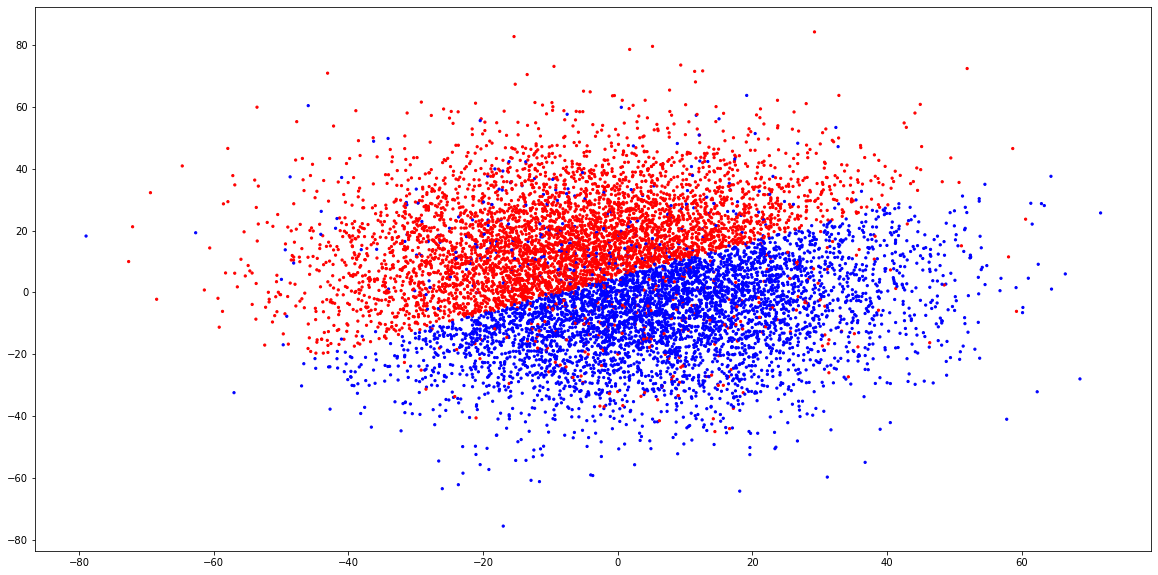

In [42]:
fig = plt.figure(figsize=(20,10))

colors = ['blue','red']

plt.scatter(X_plot, y_plot, c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=5)
plt.show()

# **Binary Classifier**

Now that we have the dataset variable loaded, let's construct the binary classifier using logistic regression. That is we need to estimate the parameters W and b where, 

\begin{equation}
z = Wx + b \\ 
a = \sigma(z) = \frac{1}{1+e^{-z}}\\ 
L(a, y) = -(y.log(a) + (1-y).log(1-a))
\end{equation}

In machine-learning terminology, the function $\sigma(z)$ is called an [activation function](https://en.wikipedia.org/wiki/Activation_function). Activation functions will be covered next week :)

# **Gradient Descent**

Here, you have to implement the gradient descent algorithm for the binary classifier and return the parameters W, b. 

**Bonus (Optional)** : Plot the loss function as a function of the number of iterations.

In [58]:
y = y.reshape(10000,1)
y.shape

(10000, 1)

In [59]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [60]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [61]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [62]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
            
    return w, b, J_history         #return final w,b and J history for graphing


In [69]:
w_tmp  = np.zeros(2)
b_tmp  = 0
alph = 0.01
iters = 1000

w_out, b_out, _ = gradient_descent(X, y, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [0.69293798]   
Iteration  100: Cost [0.69293665]   
Iteration  200: Cost [0.69293602]   
Iteration  300: Cost [0.69293563]   
Iteration  400: Cost [0.6929354]   
Iteration  500: Cost [0.69293525]   
Iteration  600: Cost [0.69293516]   
Iteration  700: Cost [0.6929351]   
Iteration  800: Cost [0.69293507]   
Iteration  900: Cost [0.69293505]   

updated parameters: w:[-0.00205958  0.00012078], b:[0.00426522]


In [ ]:
plt.plot()

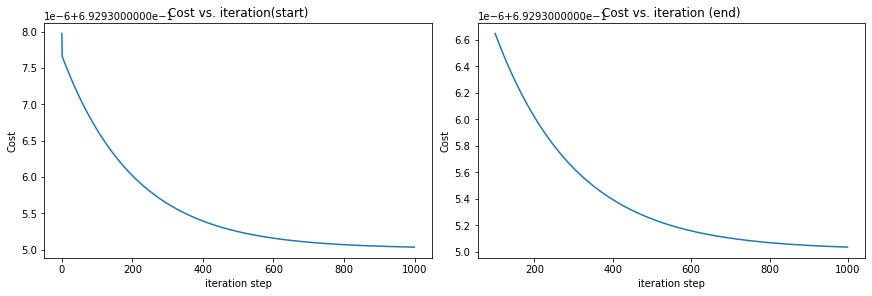

In [74]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(_[:1000])
ax2.plot(100 + np.arange(len(_[100:])), _[100:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# **Plotting the decision boundary**

Given the labelled dataset and the parameters W, b, plot the decision boundary along with the dataset (with the appropriate coloring).

In [88]:
def plot(X, y, w, b) : 

    # INSERT CODE ABOVE
    #     Plotting Decision Boundary
    x_min = X[:,0].min(axis=0)
    x_max = X[:,0].max(axis=0)
    y_max=X[:,1].max(axis=0)
    y_min=X[:,1].min(axis=0)
    xd = np.array([x_max,x_min])

    m = -(w[0]/w[1])
    c = -(b/w[1])

    yd = m*xd + c

    fig,ax = plt.subplots(1,1,figsize=(20,10))
    ax.plot(xd,yd, c="b") 

    #     Plotting the all data points
    x0 = X[:,0]
    x1 = X[:,1]
    plt.fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)
    ax.set_ylabel(r'$x_1$')
    ax.set_xlabel(r'$x_0$')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.scatter(x0,x1, c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=5)
    return plt.show()

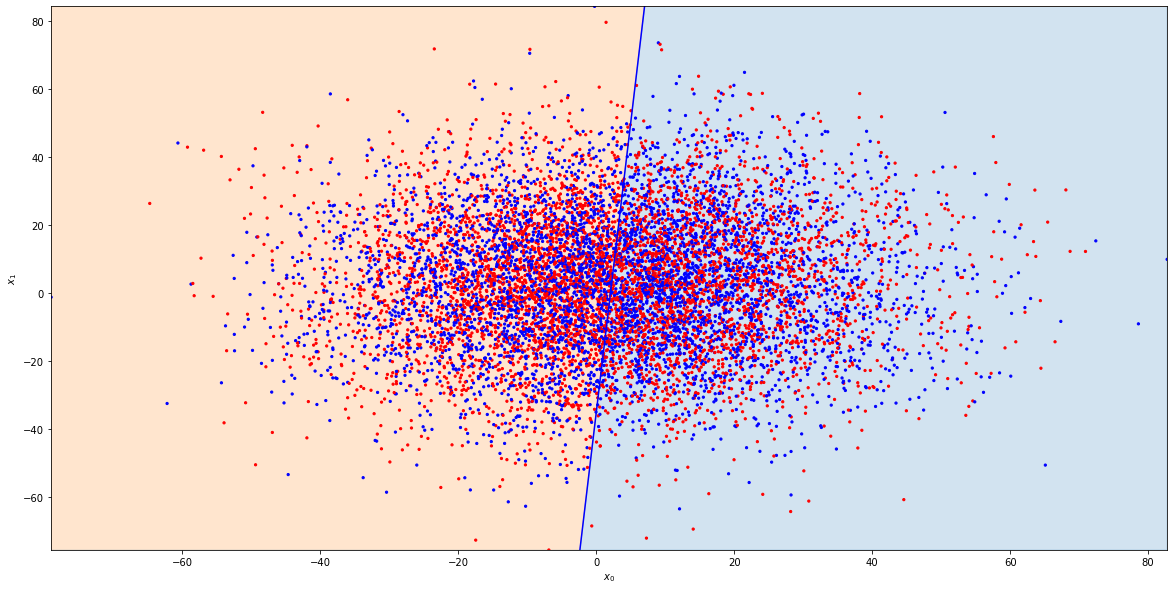

In [89]:
plot(X,y,w_out,b_out)

# **Accuracy**

Now, let us calculate the accuracy, i.e. percentage of points classified correctly by the classifier given as :

\begin{equation}
\text{accuracy} = 100 * \frac{\text{Correctly classified points}}{\text{Total Number of Points}}
\end{equation}


For this purpose, we will define two functions, for predicting the labels and accuracy.

In [93]:
def predict(X, y, w, b) : 
    '''
    Inputs 
    -> X : A numpy array of vectors denoting positions of points
    -> y : A numpy array containing labels
    -> W, b : Parameters for the model

    Returns : 
    -> A numpy array containing predicted labels for the dataset using the classifier model.
    -> Make sure that the dimensions of the input y and the output "preds" are the same.
    '''

    # INSERT CODE BELOW
    preds = []
    
    for i in range(len(y)):
        z=0
        for j in range(X.shape[1]):
            z += w[j]*X[i,j]
        z+=b
        f_x = 1/(1+np.exp(-z))

        preds = np.append(preds, 1 if f_x>=0.5 else 0)


    # INSERT CODE ABOVE

    assert(preds.shape[0] == y.shape[0])

    return preds

In [95]:
preds=predict(X,y,w_out,b_out)

For the accuracy function, we need to return the accuracy as described by the equation above

In [98]:
def accuracy(X, y,preds) : 
    '''
    Inputs 
    -> X : A numpy array of vectors denoting positions of points
    -> y : A numpy array containing labels
    -> preds : Predicted labels by the model

    Returns : 
    -> A floating point number denoting the % accuracy of the model
    '''

    # INSERT CODE BELOW
    
    sum_total=0
    for i in range(len(preds)):
        if preds[i]==y[i]:
            sum_total+=1
    accuracy = 100*(sum_total/X.shape[0])



    # INSERT CODE ABOVE

    return accuracy

In [99]:
accuracy(X,y,preds)

51.190000000000005

# **Combining the functions**

Now, we are done with all the elements we need. Let's combine them into a program. (Feel free to edit the number of iterations to observe how the line changes)

In [102]:
# The number of iterations
num_iter = 1000

w_out, b_out, _ = gradient_descent(X, y, w_tmp, b_tmp, alph, iters) 
plot(X, y, w_out, b_out)
preds = predict(X, y, w_out, b_out)
result = accuracy(X, y, preds)

print(f'The accuracy of the model is : ', result, ' %')

Iteration    0: Cost [0.69293798]   
Iteration  100: Cost [0.69293665]   
Iteration  200: Cost [0.69293602]   
Iteration  300: Cost [0.69293563]   
Iteration  400: Cost [0.6929354]   
Iteration  500: Cost [0.69293525]   
Iteration  600: Cost [0.69293516]   


KeyboardInterrupt: 

# **Bonus (Optional)**

We need to examine how well the model does depending upon the number of iterations, size of input data. So you have to plot the accuracy of the model as the number of iterations varies. This part of the assignment is open-ended and you can choose the sampling of the number of iterations, you can try varying the size of the input data, maybe even a combination of the two! We have not provided a template for this part so you can choose the plotting scheme.

In [119]:
# BONUS PART
def gradient_descent_accuracy(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    result = []
    it = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            preds = predict(X,y,w,b)
            r = accuracy(X, y, preds)
            result.append(r)
            print(f'The accuracy of the model at iteration {i} is {r:1.2f} % '.format())
            it.append(i)
                  
            
    return w, b, J_history,result,it        #return final w,b and J history for graphing


In [121]:
w_tmp  = np.zeros(2)
b_tmp  = 0
alph = 0.01
iters = 1000

w_out, b_out, J_hist,result,it = gradient_descent_accuracy(X, y, w_tmp, b_tmp, alph, iters) 

The accuracy of the model at iteration 0 is 51.13 % 
The accuracy of the model at iteration 100 is 51.22 % 
The accuracy of the model at iteration 200 is 50.98 % 
The accuracy of the model at iteration 300 is 51.02 % 
The accuracy of the model at iteration 400 is 51.07 % 
The accuracy of the model at iteration 500 is 51.04 % 
The accuracy of the model at iteration 600 is 51.02 % 
The accuracy of the model at iteration 700 is 51.09 % 
The accuracy of the model at iteration 800 is 51.13 % 
The accuracy of the model at iteration 900 is 51.19 % 


Text(0.5, 0, '$Iterations $')

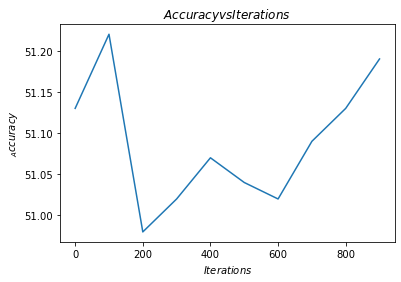

In [123]:
plt.plot(it,result)
plt.title(r'$Accuracy vs Iterations$')
plt.ylabel(r'$_Accuracy $')
plt.xlabel(r'$Iterations $')

# **Submission Instructions**

Upload this notebook on your github classroom repository by the name Week1.ipynb